Preamble

In [1]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_validate, cross_val_score  # <--- new
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# import libraries for charting and manipulations with datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

from keras.models import Sequential
from keras.layers import Dense
import numpy

from matplotlib import pyplot


Keras built-in train-validate split with NN

Epoch 1/150
52/52 [==============================] - 2s 11ms/step - loss: 5.9806 - accuracy: 0.5817 - val_loss: 3.3020 - val_accuracy: 0.5748
Epoch 2/150
52/52 [==============================] - 0s 6ms/step - loss: 2.9242 - accuracy: 0.5856 - val_loss: 2.0429 - val_accuracy: 0.6575
Epoch 3/150
52/52 [==============================] - 0s 7ms/step - loss: 1.7539 - accuracy: 0.6012 - val_loss: 1.4070 - val_accuracy: 0.6654
Epoch 4/150
52/52 [==============================] - 0s 7ms/step - loss: 1.1368 - accuracy: 0.6051 - val_loss: 1.0560 - val_accuracy: 0.6260
Epoch 5/150
52/52 [==============================] - 0s 6ms/step - loss: 0.7963 - accuracy: 0.6206 - val_loss: 0.8848 - val_accuracy: 0.5394
Epoch 6/150
52/52 [==============================] - 0s 7ms/step - loss: 0.7151 - accuracy: 0.6206 - val_loss: 0.8262 - val_accuracy: 0.5591
Epoch 7/150
52/52 [==============================] - 0s 7ms/step - loss: 0.6971 - accuracy: 0.6284 - val_loss: 0.8364 - val_accuracy: 0.5551
Epoch 8/150


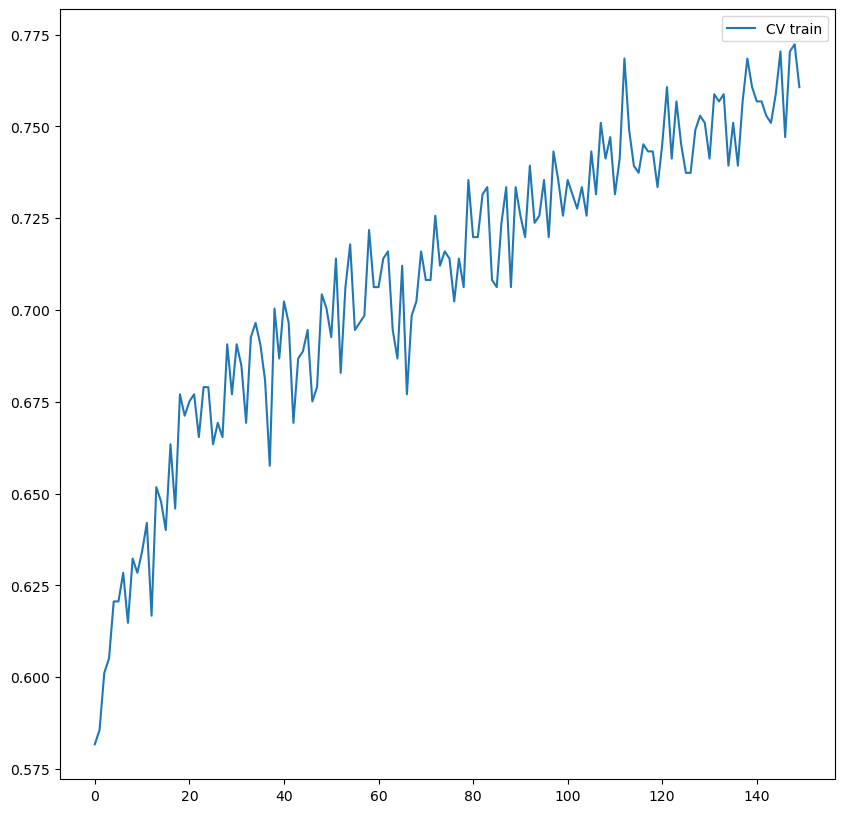

In [24]:
# demo modified from https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

# fix random seed for reproducibility
numpy.random.seed(7)

# load pima indians dataset
dataset = numpy.loadtxt("5A pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:7]
Y = dataset[:,8]

# create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10)

# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history.history['accuracy'], label='CV train' )
pyplot.legend()
pyplot.show()

# check out keras "fit" documenation at https://keras.io/api/models/model_training_apis/

Keras conventional NN, apply test/validate split prior

Epoch 1/150
52/52 [==============================] - 1s 9ms/step - loss: 32.1894 - accuracy: 0.3424 - val_loss: 17.8235 - val_accuracy: 0.3622
Epoch 2/150
52/52 [==============================] - 0s 4ms/step - loss: 8.8519 - accuracy: 0.3658 - val_loss: 2.0115 - val_accuracy: 0.5512
Epoch 3/150
52/52 [==============================] - 0s 5ms/step - loss: 1.1685 - accuracy: 0.5584 - val_loss: 0.9647 - val_accuracy: 0.5433
Epoch 4/150
52/52 [==============================] - 0s 5ms/step - loss: 0.8154 - accuracy: 0.6109 - val_loss: 0.8777 - val_accuracy: 0.5906
Epoch 5/150
52/52 [==============================] - 0s 9ms/step - loss: 0.7668 - accuracy: 0.6265 - val_loss: 0.8792 - val_accuracy: 0.5394
Epoch 6/150
52/52 [==============================] - 0s 6ms/step - loss: 0.7797 - accuracy: 0.6167 - val_loss: 0.8517 - val_accuracy: 0.6220
Epoch 7/150
52/52 [==============================] - 0s 7ms/step - loss: 0.7613 - accuracy: 0.6381 - val_loss: 0.8221 - val_accuracy: 0.5906
Epoch 8/150

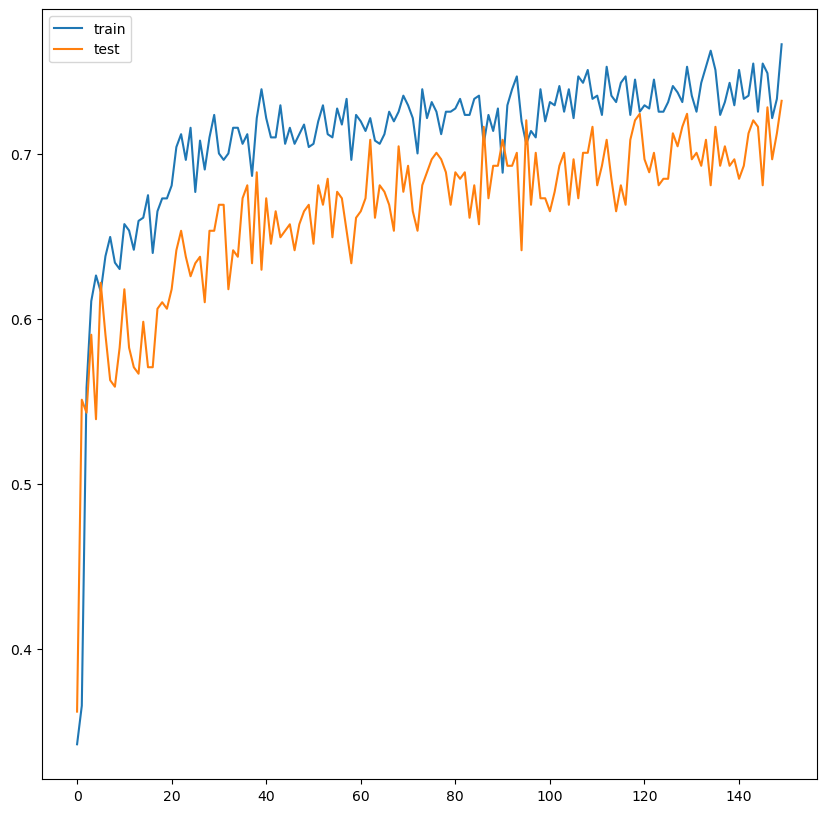

In [3]:
# demo modified from https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/


# MLP with manual validation set
from keras.models import Sequential   # <--- new
from keras.layers import Dense
from sklearn.model_selection import train_test_split  # <--- new
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("5A pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:7]
Y = dataset[:,8]

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)  # <--- new

# create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history.history['accuracy'], label='train', )
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Keras k-fold cross validation

accuracy: 70.13%
accuracy: 72.73%
accuracy: 71.43%


accuracy: 68.83%


accuracy: 70.13%
accuracy: 55.84%
accuracy: 64.94%
accuracy: 67.53%
accuracy: 72.37%
accuracy: 72.37%
68.63% (+/- 4.85%)


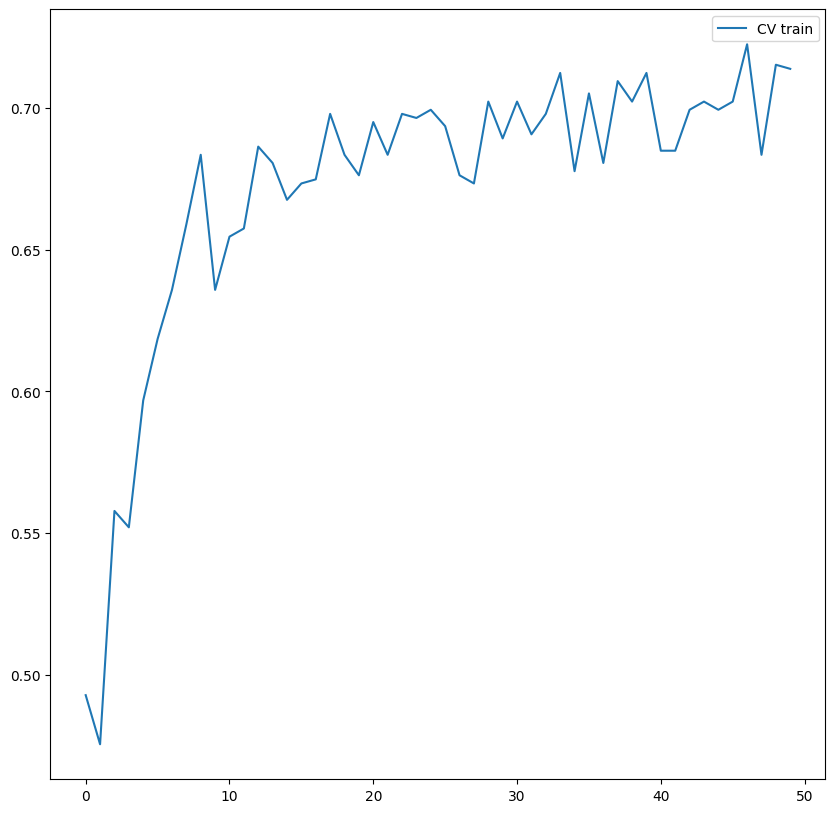

In [4]:
# demo modified from https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load pima indians dataset
dataset = numpy.loadtxt("5A pima-indians-diabetes.data.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X, Y):

  # create model
	model = Sequential()
	model.add(Dense(12, input_dim=8, activation='relu'))
	model.add(Dense(8, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
 
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
 
	# Fit the model
	history = model.fit(X[train], Y[train], epochs=50, batch_size=10, verbose=0)
 
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
 
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

# plot training history
pyplot.figure(figsize=(10,10))
pyplot.plot(history.history['accuracy'], label='CV train')
pyplot.legend()
pyplot.show()

Resampling & Cross Validation

This demo is slightly modified from https://github.com/vaasha/Machine-leaning-in-examples


`Scikit Learn` is favorite python library to perform many machine learning operations and it brings many methods which helps to split the data into training, testing and validation set. The most popular which we will review in this tutorial are: 

* train_test_split - creates single split into train and test set.
* Kfold - creates k-fold splits allowing cross validation
* StratifiedKFold - creates k-fold splits considering the distribution of the target variable
* cross_val_score - evaluta model's score through cross validation

You should be aware that cross-validation is however not suitable for all the occasions and you should think wisely how you split the data.

More about cross validaiton:
* https://scikit-learn.org/stable/modules/cross_validation.html
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)

Train-test split

In [4]:
# create training and testing vars
X = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
y = X*2


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('-- random (default)--')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train, y_train)
print(X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\n-- random state = 42 --')
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print(X_train, y_train)
print(X_test, y_test)

# test randomness

# look at documentation

-- random (default)--
(16,) (16,)
(4,) (4,)
[12  1 19  7 14 20 11 15  9 17 10 13  8  4  5 16] [24  2 38 14 28 40 22 30 18 34 20 26 16  8 10 32]
[ 2 18  3  6] [ 4 36  6 12]

-- random state = 42 --
(16,) (16,)
(4,) (4,)
[ 9  6 12  4 19 17 14  3 10 20  5 13  8 11 15  7] [18 12 24  8 38 34 28  6 20 40 10 26 16 22 30 14]
[ 1 18 16  2] [ 2 36 32  4]


## K-fold split data

In [5]:
# create the range 1 to 25
rn = range(1,26)
print(rn)

range(1, 26)


In [6]:

# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
# kf3 = KFold(n_splits=3, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=True)

# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
for train_index, test_index in kf3.split(rn):
    print(train_index, '\n', test_index, '\n', '\n')

[ 0  2  3  4  5  6  7  8  9 11 12 14 16 17 19 21] 
 [ 1 10 13 15 18 20 22 23 24] 
 

[ 0  1  2  5  9 10 12 13 15 16 18 19 20 21 22 23 24] 
 [ 3  4  6  7  8 11 14 17] 
 

[ 1  3  4  6  7  8 10 11 13 14 15 17 18 20 22 23 24] 
 [ 0  2  5  9 12 16 19 21] 
 



Repeated for k=5

In [7]:
# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
kf5 = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf5.split(rn):
    print(train_index, test_index, '\n')

[ 0  1  3  4  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24] [ 2  5  6  8 17] 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 17 19 20 23 24] [13 16 18 21 22] 

[ 0  2  3  4  5  6  7  8  9 10 13 16 17 18 19 20 21 22 23 24] [ 1 11 12 14 15] 

[ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 21 22 23] [ 0  4 19 20 24] 

[ 0  1  2  4  5  6  8 11 12 13 14 15 16 17 18 19 20 21 22 24] [ 3  7  9 10 23] 



In [8]:
# to get the values from our data, we use np.take() to access a value at particular index
for train_index, test_index in kf3.split(rn):
    print(np.take(rn,train_index), np.take(rn,test_index))

[ 3  4  5 10 12 13 14 16 17 18 19 20 21 22 23 25] [ 1  2  6  7  8  9 11 15 24]
[ 1  2  3  4  6  7  8  9 11 12 15 16 18 19 20 22 24] [ 5 10 13 14 17 21 23 25]
[ 1  2  5  6  7  8  9 10 11 13 14 15 17 21 23 24 25] [ 3  4 12 16 18 19 20 22]


## K-fold split visualization

In [12]:
# Let's split our test range into 5 and 3 folds and display the splits on the chart.
# In order to clearly show which data belongs to each set, we will shift the values by -.1 and +.1
# the first fold will contain values 0.9 in train and 1.1 in the test set, second 1.9 and 2.1, etc.
# we will also give each sets the different color
# because we will repeat this exercise for the shuffled version, let's create a function 

def kfoldize(kf, rn, shift=.1):
    train = pd.DataFrame()
    test = pd.DataFrame()
    i = 1
    for train_index, test_index in kf.split(rn):
        train_df = pd.DataFrame(np.take(rn, train_index), columns=["x"])
        train_df["val"] = i - shift
        # train = train.append(train_df)
        train = pd.concat([train,train_df])

        test_df = pd.DataFrame(np.take(rn, test_index), columns=["x"])
        test_df["val"] = i + shift
        # test = test.append(test_df)
        test = pd.concat([test,test_df])

        i += 1
    return train, test

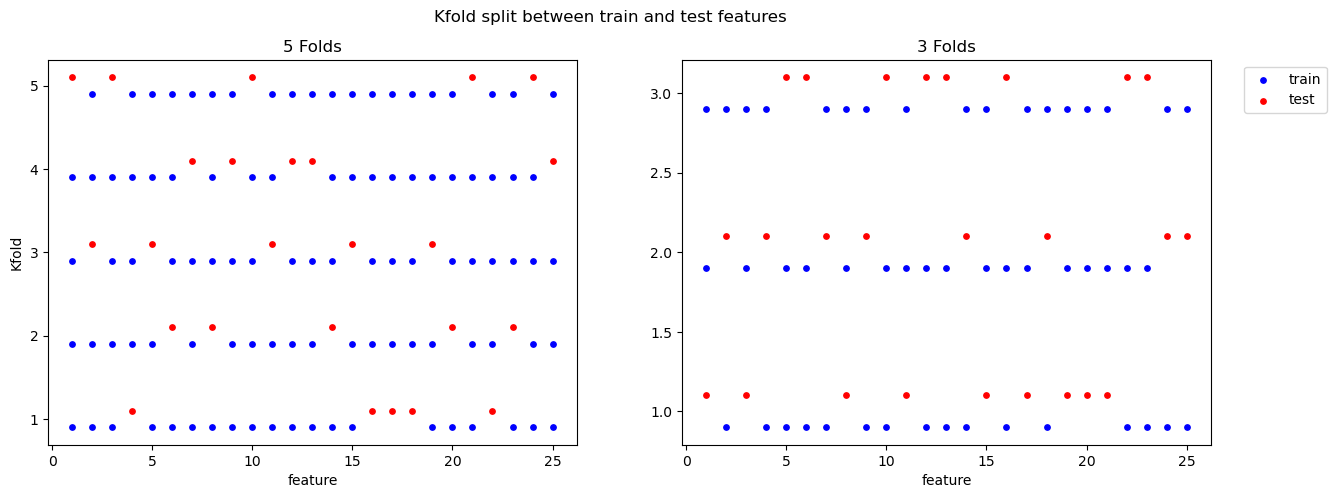

In [13]:
train5, test5 = kfoldize(kf5,rn)
train3, test3 = kfoldize(kf3,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train5)
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test5)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train3)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test3)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[1].set_xlabel("feature")
ax[0].set_title("5 Folds")
ax[1].set_title("3 Folds")
plt.suptitle("Kfold split between train and test features")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [14]:
# let's make sure how the values are distributes between the sets; Also we will create function so that we can repeat
def kfold_stats(df, name):
    s =  pd.Series({"Min value: ": df["x"].min(),
              "Max value: ": df["x"].max(),
              "Min occurance: ": df["x"].value_counts().min(),
              "Max occurance: ": df["x"].value_counts().max(),
               "Min lenght": df.groupby("val").count().min().values[0],
               "Max lenght": df.groupby("val").count().max().values[0]})
    s.name = name
    return s
pd.concat([kfold_stats(train5, "Train5"), kfold_stats(test5,"Test5"),
          kfold_stats(train3, "Train3"), kfold_stats(test3,"Test3")], 
          axis=1)

,Train5,Test5,Train3,Test3
Min value:,1,1,1,1
Max value:,25,25,25,25
Min occurance:,4,1,2,1
Max occurance:,4,1,2,1
Min lenght,20,5,16,8
Max lenght,20,5,17,9


The table above summarizes some key facts about the KFold:

* `Min and Max value` - both train and test cover all the features
* `Min and Max occurrence`- each value occurs once in the test set and k-1 times in the train set
* `Min and Max value length` - in case you have a number of features which is not dividable by n, some will have different split between test and train sets. E.g. in case of 25 features and 3 split the ratios as 16/9, 17/8, 17/8

## Shuffled KFold
In the previous example, you have seen the unshuffled train/test distribution. Such distribution can influence the result of the machine learning model so it is often useful to split the features randomly in order to prove the abilities of your model. A random split of the data is achieved by the `shuffle` parameter. `random-state` parameter initiates the randomizer the way that using the same random state ensures the same split. 

In [13]:
kf42 = KFold(n_splits=5, shuffle=True, random_state=42)
kf123 = KFold(n_splits=5, shuffle=True, random_state=123)

<ipython-input-10-4644af444669>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
<ipython-input-10-4644af444669>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
<ipython-input-10-4644af444669>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
<ipython-input-10-4644af444669>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
<ipython-input-10-4644af444669>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_

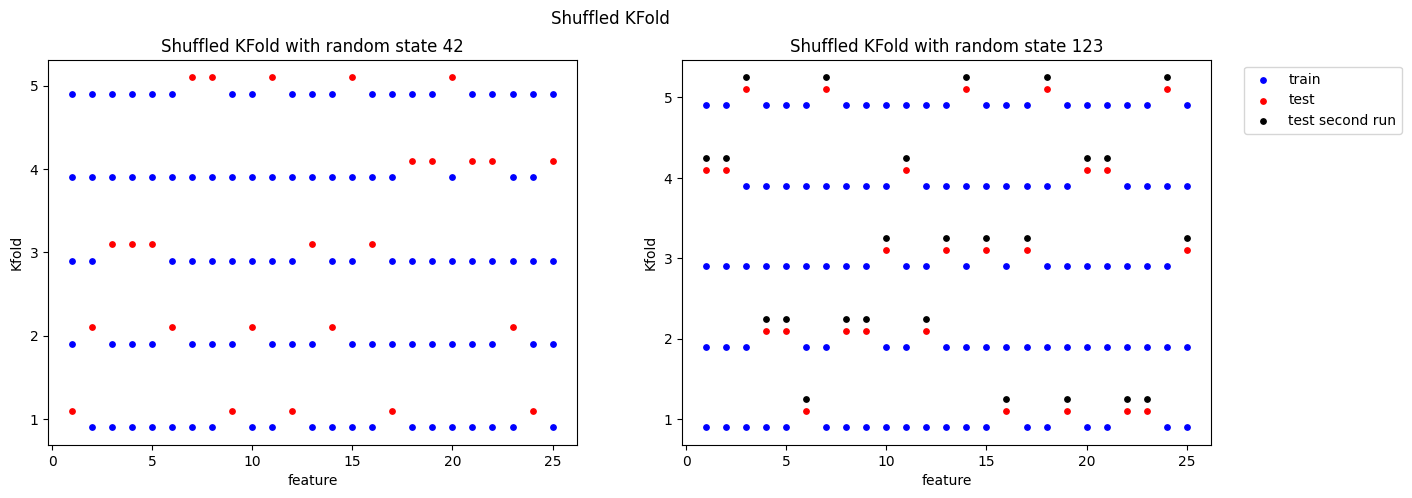

In [14]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(kf123,rn)
train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("Shuffled KFold with random state 123")
plt.suptitle("Shuffled KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Kfold on the real dataset
Let's use the Kfold to evaluate a classification model on the popular Iris Dataset. It contains 150 mesaurement of petal and sepal sizes of the 3 varietals of Iris flower - setosa, versicolor and virginica. Each contains 50 measurement in the set. 

Iris dataset on scikit-learn: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [25]:
iris = load_iris(return_X_y=False)
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
features = iris['feature_names']
iris_df['target'] = iris.target
iris_df["target_name"] = iris_df['target'].map({i:name for i,name in enumerate(iris.target_names)})
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
149,5.9,3.0,5.1,1.8,2,virginica
84,5.4,3.0,4.5,1.5,1,versicolor
40,5.0,3.5,1.3,0.3,0,setosa
66,5.6,3.0,4.5,1.5,1,versicolor
106,4.9,2.5,4.5,1.7,2,virginica


In [26]:
# Let's see how many samples of each iris type we have in our set
pd.DataFrame(iris_df.groupby("target_name").size().reset_index()).rename(columns={0:"samples"})

,target_name,samples
0,setosa,50
1,versicolor,50
2,virginica,50


### Single fold
Let's perform logistics regression using traditional train_test_split which will split the data into train and test set, so that each target value appear in both training and testing set similar number of times. 

In [27]:
# initialize the model
model = LogisticRegression(solver="liblinear", multi_class="auto")

In [28]:
#Logistic regression without Kfold, just split into 80% train and 20% test set
X = iris_df[features]
y = iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
#Train the model
model.fit(X_train, y_train) #Training the model
pd.DataFrame({"Accurancy on Train":[accuracy_score(y_train, model.predict(X_train))],
    "Accurancy on Test":[accuracy_score(y_test, model.predict(X_test))]})

,Accurancy on Train,Accurancy on Test
0,0.958333,1.0


### KFold
Kfold method returns the order of the samples chosen for train and test sets in each fold. On a pandas dataframe we have use to .iloc function to get the correct rows. Because I haven't split the data into X (features) and y (target) I have to also use .loc, to choose the right columns (.loc[:,features]) or simply pick the columns (['target'])

In [30]:
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
# kf3 = KFold(n_splits=3, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=True)

# the Kfold function retunrs the indices of the data. Our range goes from 1-25 so the index is 0-24
for train_index, test_index in kf3.split(rn):
    print(train_index, '\n', test_index, '\n', '\n')

[ 0  2  4  5  6  7  9 10 11 12 13 19 20 21 22 24] 
 [ 1  3  8 14 15 16 17 18 23] 
 

[ 1  3  4  8 11 12 13 14 15 16 17 18 19 20 21 23 24] 
 [ 0  2  5  6  7  9 10 22] 
 

[ 0  1  2  3  5  6  7  8  9 10 14 15 16 17 18 22 23] 
 [ 4 11 12 13 19 20 21 24] 
 



In [31]:
i = 1
for train_index, test_index in kf3.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index][features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index]['target']
        
    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}")
    i += 1

Accuracy for the fold no. 1 on the test set: 0.96
Accuracy for the fold no. 2 on the test set: 0.92
Accuracy for the fold no. 3 on the test set: 0.98


But why the accuracy is each fold **0.0**? The reason is the uniformity of the splits. Since the data are ordered that setosa appears on the first fifty rows of the dataset, followed by versicolor and virginica we have achieved unique distribution of the training set, that it doesn't contain any target expected in the test set. Most machine learning model cannot learn to clasify into a class which it has never seen.  Which is visible on the third split

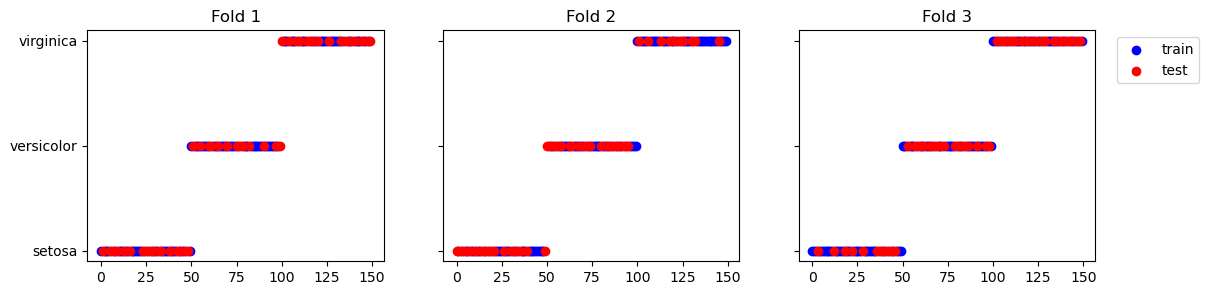

In [32]:
target_name = iris_df["target"]

fig, ax = plt.subplots(1,3, figsize=(13,3), sharey=True)
for i, (train_index, test_index) in enumerate(kf3.split(iris_df)):
    ax[i].scatter(x=train_index,y=target_name.iloc[train_index],label ="train", c='b')
    ax[i].scatter(x=test_index,y=target_name.iloc[test_index], label = "test", c='r')
    ax[i].set_title(f"Fold {i+1}")

ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels(iris["target_names"])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

## Shuffled KFold
One way to get around this issue is to use the shuffled Kfold

In [33]:
dfs = []
kf = KFold(n_splits=3, shuffle=True, random_state=123)
i = 1

for train_index, test_index in kf.split(iris_df):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']
    
    #Train the model
    model.fit(X_train, y_train) #Training the model
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

Accuracy for the fold no. 1 on the test set: 0.98
Accuracy for the fold no. 2 on the test set: 0.94
Accuracy for the fold no. 3 on the test set: 0.88


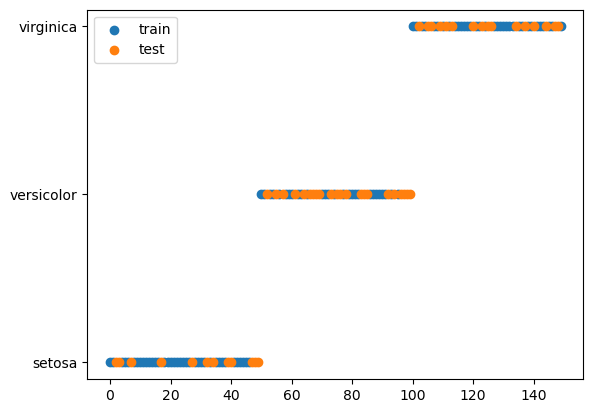

In [34]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.show()

You can see that now we pick samples from all three types of irises, however some are chosen more often than others. 

In [35]:
pd.concat(dfs,axis=1, sort=False)

,train 1,test 1,|,train 2,test 2,|,train 3,test 3,|
target_name,,,,,,,,,
versicolor,39,11,|,33,17,|,28,22,|
virginica,31,19,|,35,15,|,34,16,|
setosa,30,20,|,32,18,|,38,12,|


## Stratified KFold

Instead of using random Kfold, we can use StratifiedKFold which needs extra parameter `y`. As `y` you use the target variable so that the Kfold and pick balanced distribution of the targets in each folds.

In [36]:
dfs = []
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123) # <---- new
i = 1
for train_index, test_index in kf.split(iris_df, iris_df["target"]):
    X_train = iris_df.iloc[train_index].loc[:, features]
    X_test = iris_df.iloc[test_index].loc[:,features]
    y_train = iris_df.iloc[train_index].loc[:,'target']
    y_test = iris_df.loc[test_index].loc[:,'target']

    #Train the model
    model.fit(X_train, y_train) #Training the model
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, model.predict(X_test))}, doublecheck: {model.score(X_test,y_test)}")
    
    # how many occurances appear in the train set
    s_train = iris_df.iloc[train_index].loc[:,'target_name'].value_counts()
    s_train.name = f"train {i}"
    s_test = iris_df.iloc[test_index].loc[:,'target_name'].value_counts()
    s_test.name = f"test {i}"
    df = pd.concat([s_train, s_test], axis=1, sort=False)
    df["|"] = "|"
    dfs.append(df)
    
    i += 1

Accuracy for the fold no. 1 on the test set: 0.94, doublecheck: 0.94
Accuracy for the fold no. 2 on the test set: 0.98, doublecheck: 0.98
Accuracy for the fold no. 3 on the test set: 0.92, doublecheck: 0.92


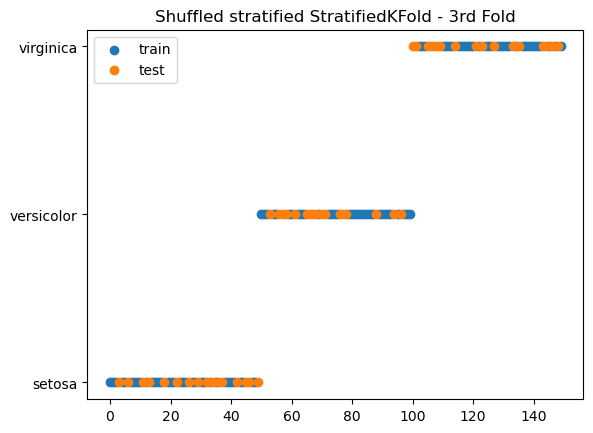

In [37]:
plt.scatter(x=y_train.index,y=iris_df.iloc[train_index].loc[:,'target_name'],label ="train")
plt.scatter(x=y_test.index,y=iris_df.iloc[test_index].loc[:,'target_name'], label = "test")
plt.legend()
plt.title("Shuffled stratified StratifiedKFold - 3rd Fold")
plt.show()

In [38]:
pd.concat(dfs,axis=1, sort=False)

,train 1,test 1,|,train 2,test 2,|,train 3,test 3,|
target_name,,,,,,,,,
virginica,34,16,|,33,17,|,33,17,|
setosa,33,17,|,33,17,|,34,16,|
versicolor,33,17,|,34,16,|,33,17,|


## Cross Validation without KFold
If you don't want to play with the split data, you don't have to do KFolds, cross_validate or cross_val_score will train using your data and prefered number of splits and give you the score on the testing set. 

In [39]:
# cross_validate allow to specify metrics which you want to see
for i, score in enumerate(cross_validate(model, X,y, cv=3)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.96
Accuracy for the fold no. 1 on the test set: 0.96
Accuracy for the fold no. 2 on the test set: 0.94


In [40]:
for i, score in enumerate(cross_val_score(model, X,y, cv=3)):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.96
Accuracy for the fold no. 1 on the test set: 0.96
Accuracy for the fold no. 2 on the test set: 0.94


## Lets explore other Cross-validation methods

### Repeated KFold

In [31]:
from sklearn.model_selection import RepeatedKFold

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
krf42 = RepeatedKFold(n_splits=3, n_repeats=2, random_state=42)

<ipython-input-10-4644af444669>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
<ipython-input-10-4644af444669>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
<ipython-input-10-4644af444669>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_df)
<ipython-input-10-4644af444669>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append(test_df)
<ipython-input-10-4644af444669>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(train_

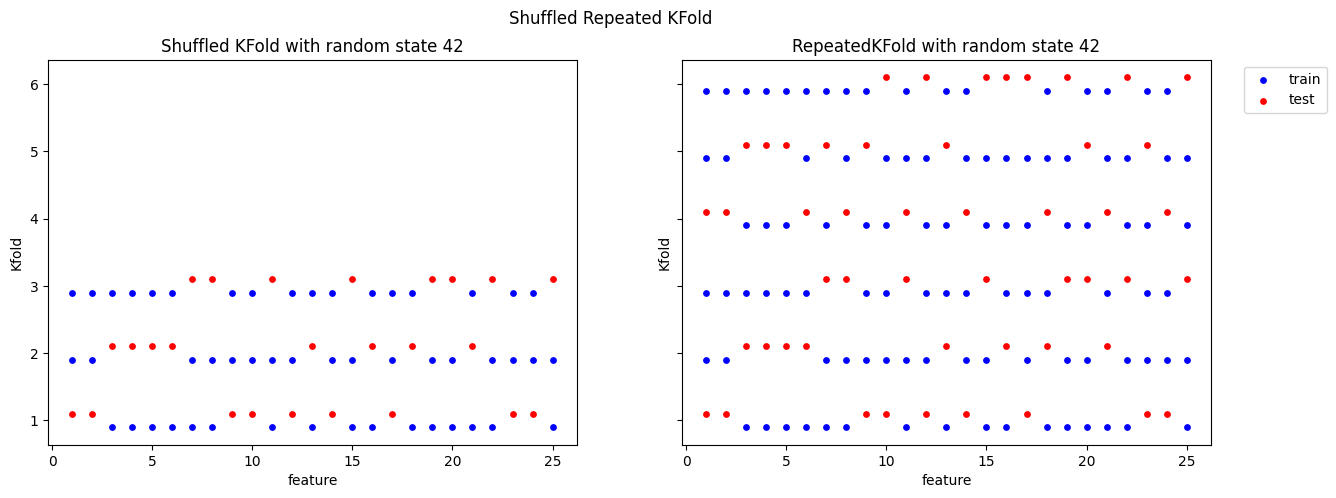

In [32]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(krf42,rn)
#train123_2, test123_2 = kfoldize(kf123,rn,shift=.25)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("RepeatedKFold with random state 42")
plt.suptitle("Shuffled Repeated KFold")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

RepeatedKFold is shufled per design. The first repeatition is the same like shuffled KFold having the same `random-state` and the next repetitions are creating yet another combination of the train-test split. 

### ShuffleSplit
https://scikit-learn.org/stable/modules/cross_validation.html#random-permutations-cross-validation-a-k-a-shuffle-split

In [17]:
from sklearn.model_selection import ShuffleSplit

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
ss = ShuffleSplit(n_splits=3, test_size=0.5, random_state=42)

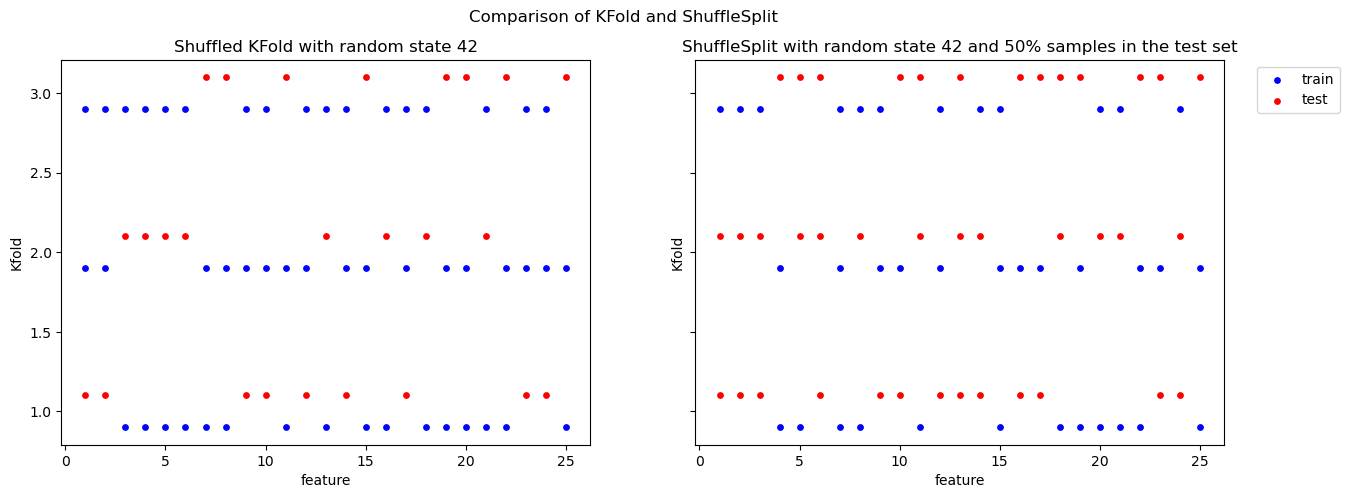

In [18]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(ss,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("ShuffleSplit with random state 42 and 50% samples in the test set")
plt.suptitle("Comparison of KFold and ShuffleSplit")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

While KFold makes sure that each sample appears once in the test set, with ShuffleSplit you specify how many samples are in the test set. Stratified Shuffle Split would consider distribution of a taget variable. 

### Leave One Out Visualization

In [19]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

rn = range(1,26)
print(rn)

train123, test123 = kfoldize(loo,rn)

print('------- training set shape ------')
print(train123.shape)

print('------- test set shape ------')
print(test123.shape)

# 600/25 = 24

range(1, 26)
------- training set shape ------
(600, 2)
------- test set shape ------
(25, 2)


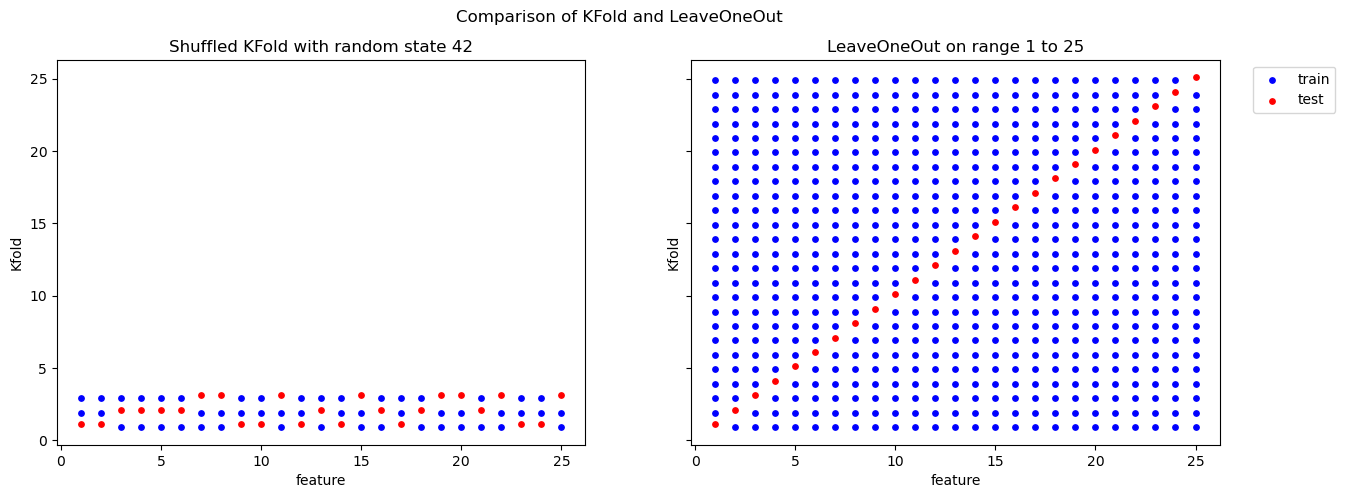

In [20]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(loo,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
#ax[1].scatter(x="x",y="val",c="k",label="test second run",s=15,data=test123_2)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("LeaveOneOut on range 1 to 25")
plt.suptitle("Comparison of KFold and LeaveOneOut")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Leave One Out does what it says, it leaves only a single observation as a test sample. 

Scikit documentation discuss this topics and suggest: "As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to LOO."
More info: https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo


### Leave P Out
https://scikit-learn.org/stable/modules/cross_validation.html#leave-p-out-lpo

In [21]:
from sklearn.model_selection import LeavePOut

kf42 = KFold(n_splits=3, shuffle=True, random_state=42)
lpo = LeavePOut(p=2)

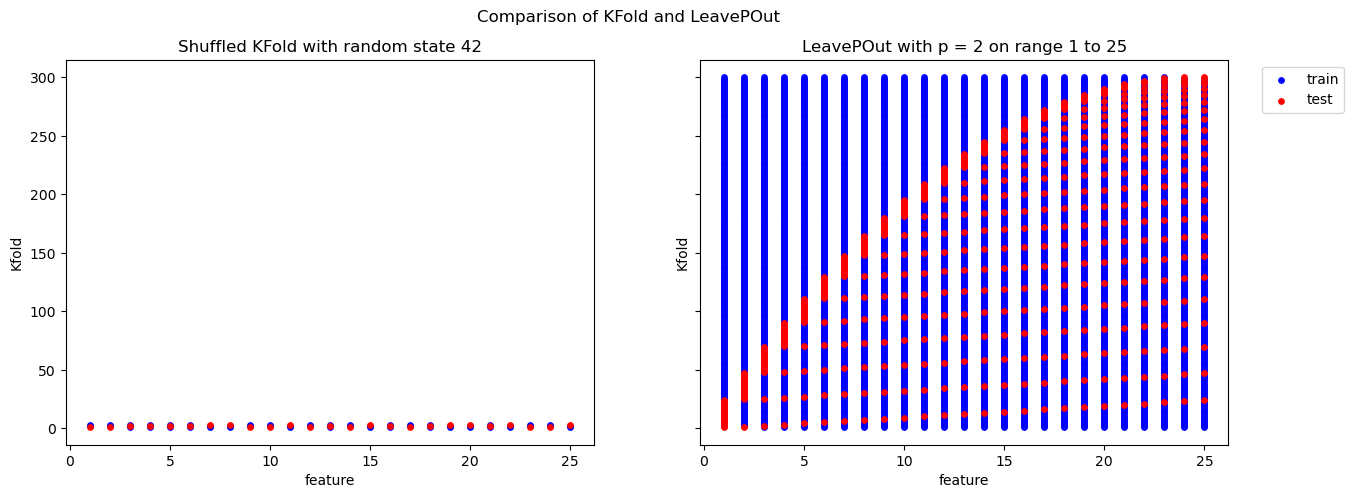

In [22]:
train42, test42 = kfoldize(kf42,rn)
train123, test123 = kfoldize(lpo,rn)

fig,ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax[0].scatter(x="x",y="val",c="b",label="train",s=15,data=train42) 
ax[0].scatter(x="x",y="val",c="r",label="test",s=15,data=test42)
ax[1].scatter(x="x",y="val",c="b",label="train",s=15,data=train123)
ax[1].scatter(x="x",y="val",c="r",label="test",s=15,data=test123)
ax[0].set_ylabel("Kfold")
ax[0].set_xlabel("feature")
ax[0].set_title("Shuffled KFold with random state 42")
ax[1].set_ylabel("Kfold")
ax[1].set_xlabel("feature")
ax[1].set_title("LeavePOut with p = 2 on range 1 to 25")
plt.suptitle("Comparison of KFold and LeavePOut")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

Leave P out creates ${n \choose p}$ combination, so in our example ${25 \choose 2} = 300$ 